### Install Dependencies

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ---------------------------------------- 2.3/2.3 MB 1.7 MB/s eta 0:00:00


In [3]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Input Data

In [3]:
DATA_DIR = r'C:\Users\HP\OneDrive\Desktop\MACHINE LEARNING PROJECTS\SENTIMENT-ANALYSIS\DATA'
df = pd.read_csv(DATA_DIR + '/' + 'Reviews.csv')

In [ ]:
df = df.head(500)

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(5,3))
ax.set_xlabel('Review Stars')
plt.show()

### Using Bert Pretrained Model From Hugging face

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

### Instantiate Model

In [7]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

### Encode And Calculate Sentiment

In [8]:
tokens = tokenizer.encode('I hated this, absolutely the worst', return_tensors='pt')

In [9]:
result = model(tokens)

In [10]:
result.logits

tensor([[ 4.8750,  1.7880, -0.8356, -3.0027, -2.0727]],
       grad_fn=<AddmmBackward0>)

In [11]:
int(torch.argmax(result.logits))+1

1

### Scapping Reviews From A website : Yelp

In [12]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
print(results)
# reviews = [result.text for result in results]

[<p class="comment__09f24__gu0rG css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Great food amazing coffee and tea. Short walk from the harbor. Staff was very friendly</span></p>, <p class="comment__09f24__gu0rG css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">It was ok. Had coffee with my friends. I'm new in the area, still need to discover new places.</span></p>, <p class="comment__09f24__gu0rG css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Great staff and food.  Must try is the pan fried Gnocchi!  The staff were really friendly and the coffee was good as well</span></p>, <p class="comment__09f24__gu0rG css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Ricotta hot cakes! These were so yummy. I ate them pretty fast and didn't share with anyone because they were that good ;). <br/><br/>I ordered a green smoothie to balance it all out. Smoothie was a nice way to end my brekkie at this restaurant. <br/><br/>Others with me ordered the salmon Benedict and the smoked s

In [15]:
reviews

['Great food amazing coffee and tea. Short walk from the harbor. Staff was very friendly',
 "It was ok. Had coffee with my friends. I'm new in the area, still need to discover new places.",
 'Great staff and food. \xa0Must try is the pan fried Gnocchi! \xa0The staff were really friendly and the coffee was good as well',
 "Ricotta hot cakes! These were so yummy. I ate them pretty fast and didn't share with anyone because they were that good ;). I ordered a green smoothie to balance it all out. Smoothie was a nice way to end my brekkie at this restaurant. Others with me ordered the salmon Benedict and the smoked salmon flatbread. They were all delicious and all plates were empty. Cheers!",
 'I came to Social brew cafe for brunch while exploring the city and on my way to the aquarium. I sat outside. The service was great and the food was good too!I ordered smoked salmon, truffle fries, black coffee and beer.',
 "It was ok. The coffee wasn't the best but it was fine. The relish on the brea

### Loading Data into DataFrame And Getting Score

In [16]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [17]:
df['review'].iloc[0]

'Great food amazing coffee and tea. Short walk from the harbor. Staff was very friendly'

In [18]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [19]:
sentiment_score(df['review'].iloc[1])

3

In [20]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [22]:
df.head()

,review,sentiment
0,Great food amazing coffee and tea. Short walk ...,5
1,It was ok. Had coffee with my friends. I'm new...,3
2,Great staff and food. Must try is the pan fri...,5
3,Ricotta hot cakes! These were so yummy. I ate ...,5
4,I came to Social brew cafe for brunch while ex...,5


In [25]:
df['review'].iloc[3]

"Ricotta hot cakes! These were so yummy. I ate them pretty fast and didn't share with anyone because they were that good ;). I ordered a green smoothie to balance it all out. Smoothie was a nice way to end my brekkie at this restaurant. Others with me ordered the salmon Benedict and the smoked salmon flatbread. They were all delicious and all plates were empty. Cheers!"

### Using NLTK Library 

In [14]:
import nltk

### Testing with one example

In [15]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [16]:
#Split the example into tokens using nltk
# use if nltk shows error: nltk.download()

tokens = nltk.word_tokenize(example)
print(tokens[:10])

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [17]:
# display the part of speech of each token using 'nltk.pos_tag()' function
tagged = nltk.pos_tag(tokens)
print(tagged[:10])

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ')]


In [18]:
# print the example along with the 'pos' tags
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### VADER Sentiment analysis on example

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

In [20]:
# nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [21]:
print(nltk.word_tokenize('No! i am Happy you fool'))
sia.polarity_scores('No! i am Happy you fool')

['No', '!', 'i', 'am', 'Happy', 'you', 'fool']


{'neg': 0.486, 'neu': 0.18, 'pos': 0.334, 'compound': -0.1759}

### VADER SENTIMENT ANALYSIS ON DATASET

In [22]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

vaders = pd.DataFrame(res).T


  0%|          | 0/500 [00:00<?, ?it/s]

In [23]:
vaders.head(10)

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
6,0.029,0.809,0.163,0.8830
7,0.034,0.693,0.273,0.9346
8,0.000,0.520,0.480,0.9487
9,0.000,0.851,0.149,0.6369
10,0.000,0.705,0.295,0.8313


### Merge the new columns with the original dataset

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plot VADER Results

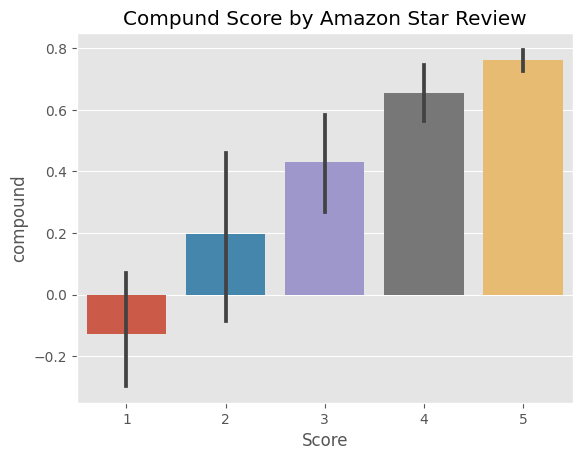

In [25]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

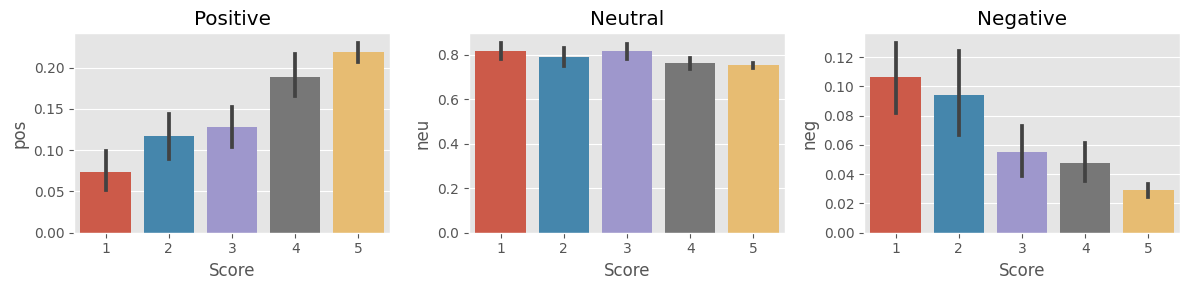

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### ROBERTTA  Pretrained Model FROM Hugging Face

In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [34]:
# using a pre-trained model 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\HP\anaconda3\envs\pytorch_p37\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


### Robertta sentiment analysis on example

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

### Robertta Sentiment Analysis ON Dataset

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

### Plotting And Visualising 

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

### Comparing VADER And ROBERTTA results

Positive 1 - Star Review

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

Negative 5 - Star Review

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

### Extra  : The Transformers Pipeline

In [41]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


KeyboardInterrupt: 

### Testing Pipeline on few examples

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('Make sure to like and subscribe!')

In [ ]:
sent_pipeline('booo')

### Using Neural Network And LSTM